In [ ]:
import numpy as np
from numpy import linalg
import scipy as sp
import math
from scipy.integrate import odeint
#from matplotlib import animation, rc
from IPython.display import HTML

import plotly.graph_objects as go
from sympy import *

In [ ]:
class mugas_vibration_functions:
  
    def __init__(self): 
        self=[];

    def dynamicSystemModel(self, X, t, A, B, cParameters):
        dXdt=A @ X + B * self.controlFn(t, cParameters);
        self.X=X;
        return dXdt

    def controlFn(self, t, cParameters):
        return cParameters[0]*np.cos(cParameters[1] * t)

    def simulateDySystem(self, Tmax, dT, X0, A,B, cParameters, xLabel, yLabel):
        t = np.linspace(0, Tmax, int(Tmax/dT+1))
        sol = odeint(self.dynamicSystemModel, X0, t, args=(A, B, cParameters));
        self.soln=sol;
        fig = go.Figure()
        [nt,nS]=sol.shape;

        # Add traces
        for nn in range(nS):
            fig.add_trace(go.Scatter(x=t, y=sol[:,nn], mode='lines+markers', name='x'+str(nn+1)))
            fig.update_layout(xaxis=dict(title=xLabel),yaxis=dict(title=yLabel))
        
        fig.show()
        return [t,sol,fig] 
    
    def animate_particle_motion(self, XX, axisRange, figTitle):
        xx=[jj[0] for jj in XX]
        yy=[jj[1] for jj in XX]
        zz=[jj[2] for jj in XX]

        fig = go.Figure(
            data=[go.Scatter3d(x=[xx[0]], y=[yy[0]],z=[zz[0]],
                            mode="markers",
                            marker=dict(color="red", size=10)),
                go.Scatter3d(x=xx, y=yy,z=zz, name='Path',
                            mode="lines",
                            line=dict(color="blue", width=2))],
            layout=go.Layout(
                scene = dict(
                            xaxis=dict(range=axisRange[0], autorange=False),
                            yaxis=dict(range=axisRange[1], autorange=False),
                            zaxis=dict(range=axisRange[2], autorange=False),
                            aspectratio=dict(x=1, y=1, z=1),
                ),
                title_text=figTitle, hovermode="closest",
                updatemenus=[dict(type="buttons",
                                buttons=[dict(label="Play",
                                                method="animate",
                                                args=[None])])]),
            frames=[go.Frame(
                data=[go.Scatter3d(
                    x=[p[0]],
                    y=[p[1]],
                    z=[p[2]],
                    name='Particle',
                    mode="markers",
                    marker=dict(color="red", size=10))])

                for p in XX]
        )

        fig.show()
        return fig

    def animate_2D_scatter_plot(self, x, YY, xlabel, ylabel, title):
        fig = go.Figure(data=[go.Scatter(x=x,y=YY[0,:])],
                layout=go.Layout(
                    xaxis={'title':xlabel},
                    yaxis={'title':ylabel,'range':[1.1*YY.min(),1.1*YY.max()]},
                    title={'text':title,'y':0.9,'x':0.5, 'xanchor': 'center','yanchor': 'top'},
                    scene = dict(aspectratio=dict(x=1, y=1)),    
                    hovermode="closest",
                    updatemenus=[dict(type="buttons",
                                    buttons=[dict(label="Play",
                                                    method="animate",
                                                    args=[None])])]
                    ),
            frames=[go.Frame(data=[go.Scatter(x=x,y=y)]) for y in YY]
        )

        #fig.show()
        return fig

In [ ]:
mv=mugas_vibration_functions()

## Whirling of a shaft

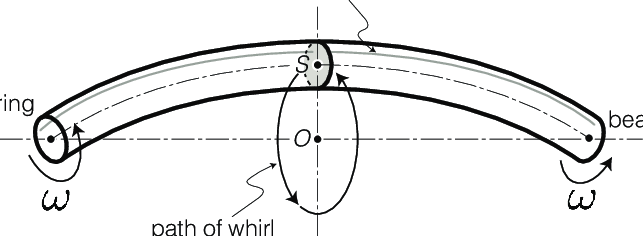

##Whirling of a shaft##

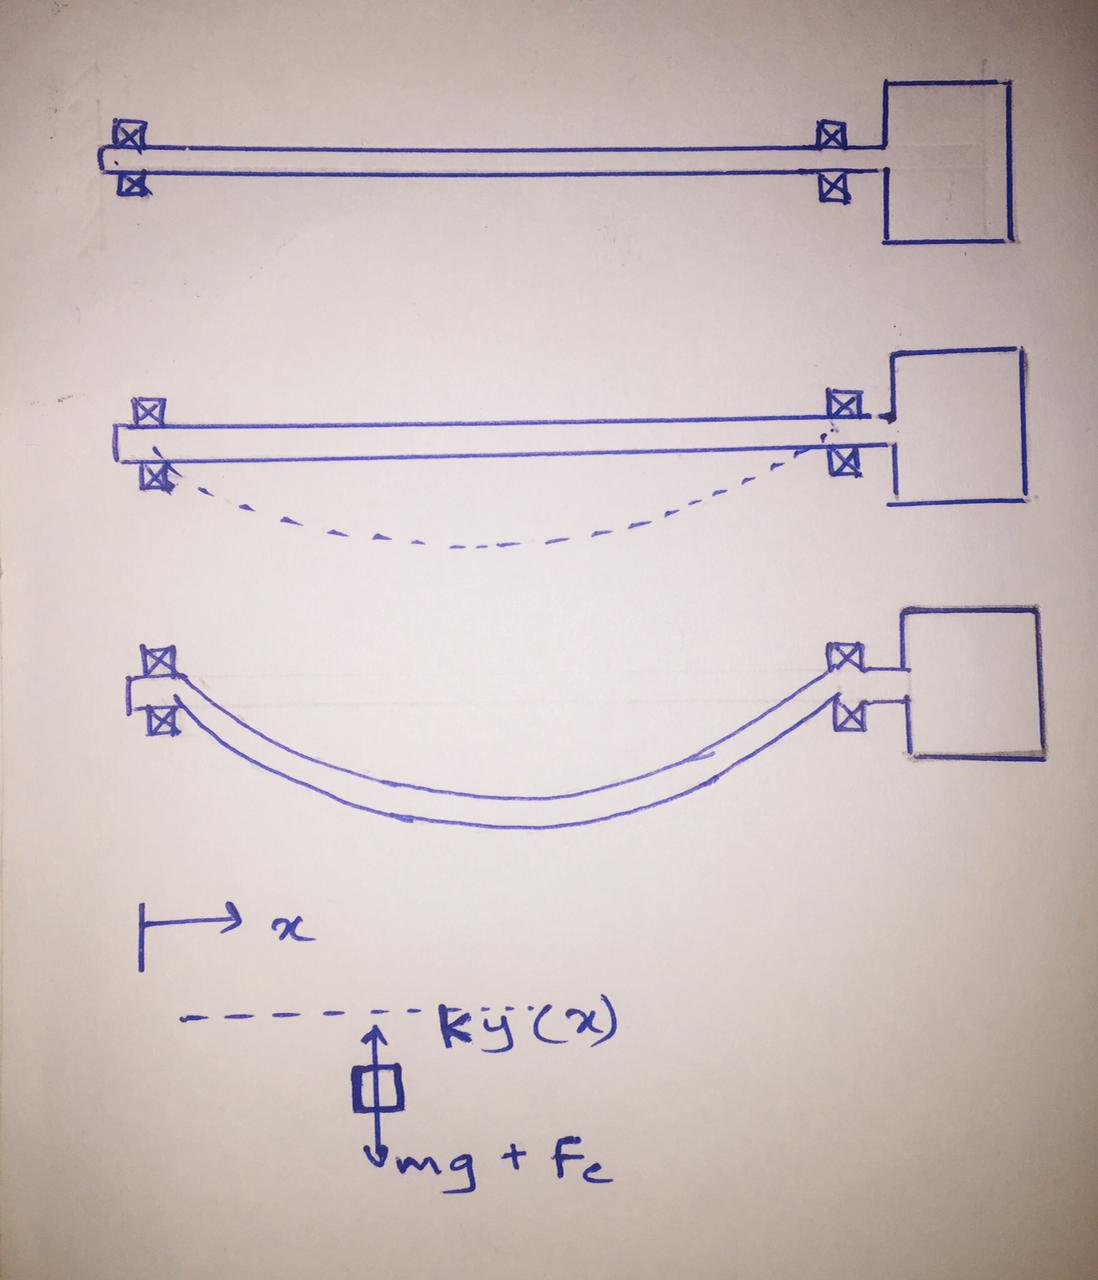

$ω_n$=$(n/L)^2$$\sqrt(EI/ρA)$


$ky=F_c + mg$ 

$k= Stiffness$ 

$y =$ Diflection of the shaft 

$F_c =$ Force acting along radius

$mg= weight$

$F_c= mrω^2$

$y = \pm g/(ω_n^2-ω^2)$

Approximation of $ω$ as 90% from $ω_n$ 

$y = \pm g/(0.19ω_n^2)$

In [66]:
import numpy as np

# Constants
L = 0.9      # Length of the shaft
E = 2.1e9    # Young's modulus
rho = 8000   # Density of the material
d = 5e-3     # Diameter of the shaft

# Cross-sectional properties
A = np.pi * (d / 2) ** 2          # Cross-sectional area
I = np.pi * (d / 2) ** 4 / 4      # Moment of inertia

# Natural frequencies and mode shapes
n = np.arange(1, 5)
fn = (n / L) ** 2 * np.sqrt(E * I / (rho * A))
un = lambda x, n: np.sin(n * np.pi * x / L)

# Finite dimensional approximation
N = 4  # Number of modes to consider
M = np.zeros((N, N))
K = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        M[i, j] = np.trapz(rho * A * un(np.linspace(0, L, 100), i+1) * un(np.linspace(0, L, 100), j+1), np.linspace(0, L, 100))
        K[i, j] = np.trapz(E * I * un(np.linspace(0, L, 100), i+1) * un(np.linspace(0, L, 100), j+1) * (np.pi * (i+1) / L)**2, np.linspace(0, L, 100))

w2, V = np.linalg.eig(np.linalg.inv(M).dot(K))
w = np.sqrt(w2)
# Print results
print("Natural Frequencies:")
for i in range(N):
    print(f"Mode {i+1}: {fn[i]/(2*np.pi):.3f} Hz (approximation: {w[i]/(2*np.pi):.3f} Hz)")
# Whirling of shaft
g = 9.81
y = np.zeros(N)
for i in range(N):
    y[i] = g / (0.19 * fn[i] / (2*np.pi))
    print(f"Whirling of shaft mode {i+1}: {y[i]:.3f} mm")
print("\nMode Shapes:")
x = np.linspace(0, L, 100)
for i in range(N):
    print(f"Mode {i+1}: {un(x, i+1)}")


Natural Frequencies:
Mode 1: 0.126 Hz (approximation: 0.356 Hz)
Mode 2: 0.503 Hz (approximation: 1.423 Hz)
Mode 3: 1.133 Hz (approximation: 1.067 Hz)
Mode 4: 2.013 Hz (approximation: 0.712 Hz)
Whirling of shaft mode 1: 410.304 mm
Whirling of shaft mode 2: 102.576 mm
Whirling of shaft mode 3: 45.589 mm
Whirling of shaft mode 4: 25.644 mm

Mode Shapes:
Mode 1: [0.00000000e+00 3.17279335e-02 6.34239197e-02 9.50560433e-02
 1.26592454e-01 1.58001396e-01 1.89251244e-01 2.20310533e-01
 2.51147987e-01 2.81732557e-01 3.12033446e-01 3.42020143e-01
 3.71662456e-01 4.00930535e-01 4.29794912e-01 4.58226522e-01
 4.86196736e-01 5.13677392e-01 5.40640817e-01 5.67059864e-01
 5.92907929e-01 6.18158986e-01 6.42787610e-01 6.66769001e-01
 6.90079011e-01 7.12694171e-01 7.34591709e-01 7.55749574e-01
 7.76146464e-01 7.95761841e-01 8.14575952e-01 8.32569855e-01
 8.49725430e-01 8.66025404e-01 8.81453363e-01 8.95993774e-01
 9.09631995e-01 9.22354294e-01 9.34147860e-01 9.45000819e-01
 9.54902241e-01 9.63842159e-0

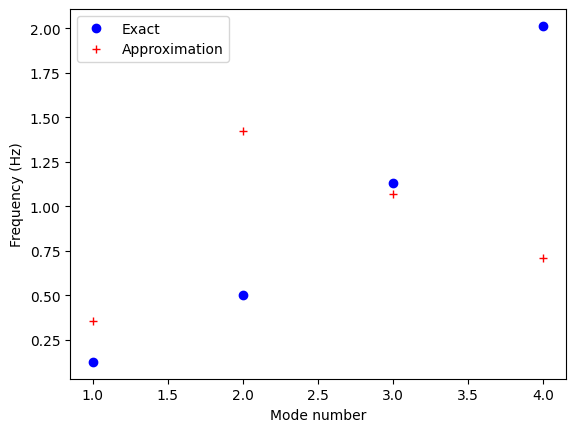

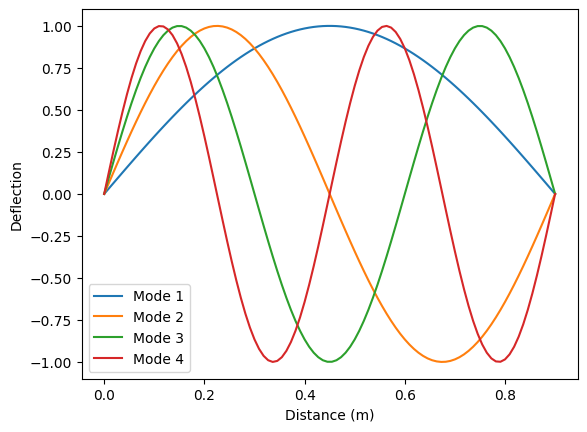

In [67]:
import matplotlib.pyplot as plt

# Plot natural frequencies
fig, ax = plt.subplots()
ax.plot(np.arange(1, N+1), fn/(2*np.pi), 'bo', label='Exact')
ax.plot(np.arange(1, N+1), w/(2*np.pi), 'r+', label='Approximation')
ax.set_xlabel('Mode number')
ax.set_ylabel('Frequency (Hz)')
ax.legend()
plt.show()

# Plot mode shapes
fig, ax = plt.subplots()
for i in range(N):
    ax.plot(x, un(x, i+1), label=f'Mode {i+1}')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Deflection')
ax.legend()
plt.show()

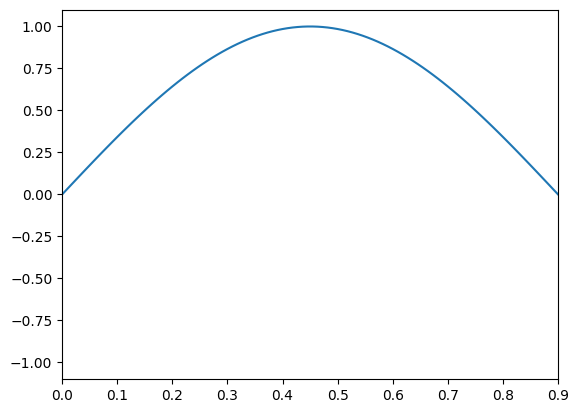

In [69]:
import matplotlib.animation as animation

# Function to compute whirling displacement
def whirling_disp(t, mode):
    return np.cos(2*np.pi*fn[mode-1]*t)

# Create figure and axis
fig, ax = plt.subplots()

# Plot initial shape of the shaft
shaft, = ax.plot(x, un(x, 1))

# Set axis limits
ax.set_xlim(0, L)
ax.set_ylim(-1.1*np.max(np.abs(un(x, 0.5))), 1.1*np.max(np.abs(un(x, 0.5))))

# Define animation function
def animate(i):
    # Compute whirling displacement
    disp = whirling_disp(i/100, 1)
    
    # Update y-data of shaft plot
    shaft.set_ydata(un(x, 1) * disp)
    
    # Return updated plot
    return shaft,

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=True)

# Show animation
plt.show()


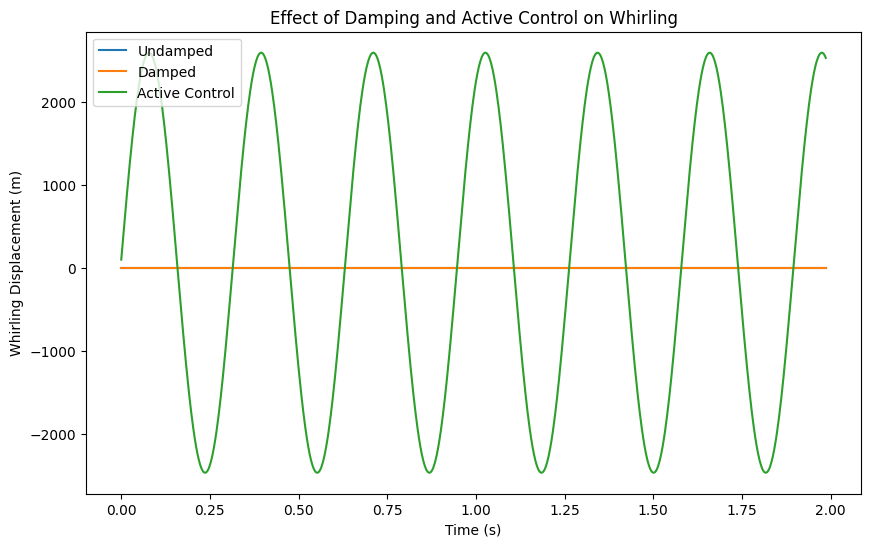

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Constants and properties
L = 0.9      # Length of the shaft
E = 2.1e9    # Young's modulus
rho = 8000   # Density of the material
d = 5e-3     # Diameter of the shaft
A = np.pi * (d / 2) ** 2          # Cross-sectional area
I = np.pi * (d / 2) ** 4 / 4      # Moment of inertia

# Natural frequencies and mode shapes
n = np.arange(1, 5)
fn = (n / L) ** 2 * np.sqrt(E * I / (rho * A))
un = lambda x, n: np.sin(n * np.pi * x / L)

# Time vector
t = np.linspace(0, 2*np.pi/fn[1], 1000)

# Whirling displacement without damping or control
disp_undamped = np.cos(2*np.pi*fn[1]*t) * un(L/2, 2)

# Whirling displacement with damping
zeta = 0.1   # Damping ratio
omega_n = 2*np.pi*fn[1]   # Natural frequency
omega_d = omega_n * np.sqrt(1 - zeta**2)  # Damped frequency
disp_damped = np.exp(-zeta*omega_n*t) * np.cos(omega_d*t) * un(L/2, 2)

# Whirling displacement with active control
kp = 100   # Proportional gain
ki = 10    # Integral gain
u = 0      # Control input
disp_controlled = np.zeros_like(disp_damped)
err = np.zeros_like(disp_damped)
for i in range(len(t)):
    err[i] = np.cos(2*np.pi*fn[1]*t[i]) - disp_controlled[i]
    u += kp*err[i] + ki*np.trapz(err[:i+1], t[:i+1])
    disp_controlled[i] = np.exp(-zeta*omega_n*t[i]) * np.cos(omega_d*t[i]) * un(L/2, 2) + u

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, disp_undamped, label='Undamped')
ax.plot(t, disp_damped, label='Damped')
ax.plot(t, disp_controlled, label='Active Control')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Whirling Displacement (m)')
ax.set_title('Effect of Damping and Active Control on Whirling')
ax.legend()
plt.show()


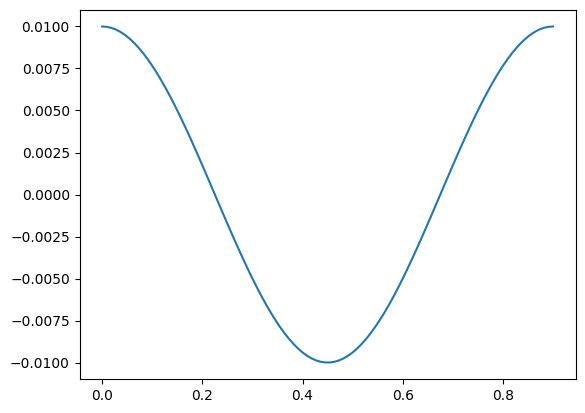

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
D = 0.005  # diameter of shaft (m)
L = 0.9  # length of shaft (m)
rho = 8000  # density of shaft (kg/m^3)
E = 2.1e11  # Young's modulus (Pa)
I = np.pi * D**4 / 64  # moment of inertia
k = np.sqrt(E*I/rho)  # wave number
omega1 = k**2*np.sqrt((np.pi/L)**4 + 0.5*(np.pi/L)**2)/2  # first resonant frequency
omega2 = k**2*np.sqrt((3*np.pi/L)**4 + 0.5*(3*np.pi/L)**2)/2  # second resonant frequency
omega3 = k**2*np.sqrt((5*np.pi/L)**4 + 0.5*(5*np.pi/L)**2)/2  # third resonant frequency
omega4 = k**2*np.sqrt((7*np.pi/L)**4 + 0.5*(7*np.pi/L)**2)/2  # fourth resonant frequency

# Initial conditions
x0 = np.array([0.01, 0, 0, 0])  # initial displacement and velocity

# Time vector
t = np.linspace(0, 2*np.pi/omega1, 100)

# Function to solve the ODE system
def func(x, t):
    dxdt = np.zeros_like(x)
    dxdt[0] = x[1]
    dxdt[1] = -omega1**2*x[0]
    dxdt[2] = x[3]
    dxdt[3] = -omega2**2*x[2]
    return dxdt

# Solve the ODE system
x = odeint(func, x0, t)

# Reshape x to (100, 4)
x = x.reshape(100, 4)

# Plot and animate the results
fig, ax = plt.subplots()
line, = ax.plot(np.linspace(0, L, 100), x[:, 0])

def update(num):
    line.set_ydata(x[:, num])
    return line,

ani = FuncAnimation(fig, update, frames=4, interval=100, blit=True)
plt.show()

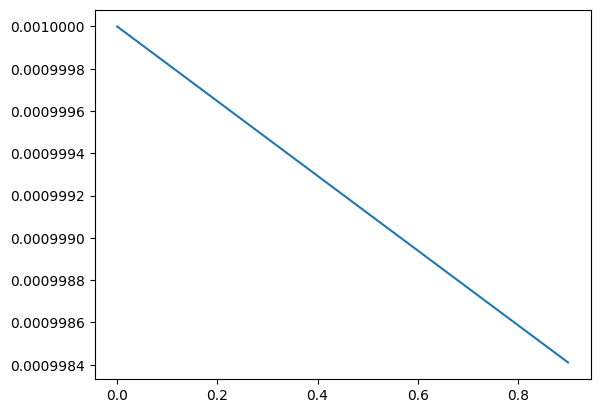

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants
d = 5 / 1000  # meters
L = 0.9  # meters
A = np.pi * d**2 / 4
rho = 8000  # kg/m^3
E = 2.1 * 10**9  # Pa
I = np.pi * d**4 / 64
c = 500  # Ns/m - damping coefficient

# Modes of resonance
f1 = (1 / (2 * L)) * np.sqrt(E * I / (rho * A))
f2 = (3 / (2 * L)) * np.sqrt(E * I / (rho * A))
f3 = (5 / (2 * L)) * np.sqrt(E * I / (rho * A))
f4 = (7 / (2 * L)) * np.sqrt(E * I / (rho * A))

# Define function for the ODE system
def ode_system(y, t):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -c / (rho * A * L) * omega - E * I / (rho * A * L**3) * theta
    return [dtheta_dt, domega_dt]

# Initial conditions
y0 = [0.001, 0]

# Time points to evaluate
t = np.linspace(0, 10, 1000)

# Solve the ODE system
x = odeint(ode_system, y0, t)

# Plot and animate the results
fig, ax = plt.subplots()
line, = ax.plot(np.linspace(0, L, len(x)), x[:, 0])

def update(num):
    line.set_ydata(x[:, num])
    return line,

ani = animation.FuncAnimation(fig, update, frames=range(len(x[0])), interval=50)
plt.show()
